In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Librerias

In [ ]:
import numpy as np
from numpy import nan
import pandas as pd

import io

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
import seaborn as sns

import os

import json


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from scipy import cluster
import sklearn.neighbors

In [ ]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga datos

## Carga de datos datos limpiados y filtrados de la muestra de subenanas.

La siguiente fase será ya clustering. Vamos a guardar la matriz con los flujos por un lado y el de las longitudes de onda por otro. Así mismo guardaremos el resto de la información de las subenanas en csv.

In [ ]:
directorio = 'BD_espectros_sample/'
muestra_BD = np.load(directorio+'muestra_SubEM_tratada.npz',allow_pickle=True)
muestra_BD.files


['flujos', 'long_onda', 'subclases', 'clase_metalicidad', 'datos', 'columnas']

In [ ]:
flujos_BD, long_onda, subclases, clase_metalicidad,datos, columnas = [muestra_BD[f] for f in muestra_BD.files]

Creamos el dataset con la información

In [ ]:
df_subenanas = pd.DataFrame(columns=columnas, data = datos)
df_subenanas.head(2)

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,3.9e-05,4.6e-05,0,'STAR',M8,275-51910-272,False,False,good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.45248,False,False,6.97573,4.32881,sdM,M4
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,2.3e-05,0,'STAR',M2,275-51910-337,False,False,good,False,9215.1,SDSS104320.5+010439.4,4,0.401911,0.591834,0.635272,False,False,0.322523,0.151661,sdM,M4


In [ ]:
subclases_c=df_subenanas.subclass_c

In [ ]:
flujos_BD.shape

(3003, 1000)

In [ ]:
long_onda.shape

(1000,)

In [ ]:
subclases.shape

(3003,)

In [ ]:
del muestra_BD

## Carga de los espectros transformados de las plantillas

In [ ]:
directorio = 'Plantillas/'
datos_plantillas = np.load(directorio+'plantillas_tratadas.npz',allow_pickle=True)
datos_plantillas.files


['flujos_p', 'long_onda', 'subclases_m']

In [ ]:
flujos_p, longitudes_onda, subclases_m = [datos_plantillas[f] for f in datos_plantillas.files]


In [ ]:
flujos_p

array([[0.33012101, 0.33001813, 0.33143835, ..., 1.02841537, 0.96958836,
        0.90644285],
       [0.31300304, 0.31133369, 0.31165145, ..., 1.02383551, 0.9755676 ,
        0.92333613],
       [0.28007088, 0.27774531, 0.27471599, ..., 1.06005094, 1.00972962,
        0.9561154 ],
       ...,
       [0.09780173, 0.09173639, 0.08293865, ..., 1.41797242, 1.33131688,
        1.25141127],
       [0.04924733, 0.04107532, 0.03072548, ..., 1.56583721, 1.61523567,
        1.65851942],
       [0.06801822, 0.04141476, 0.00633613, ..., 1.74000164, 1.69894458,
        1.65895511]])

In [ ]:
longitudes_onda.shape

(1000,)

In [ ]:
subclases_m

array(['usdm0', 'usdm1', 'usdm2', 'usdm3', 'usdm4', 'usdm5', 'usdm6',
       'usdm7', 'usdm8', 'usdm9', 'esdm0', 'esdm1', 'esdm2', 'esdm3',
       'esdm4', 'esdm5', 'esdm6', 'esdm7', 'esdm8', 'esdm9', 'sdm0',
       'sdm1', 'sdm2', 'sdm3', 'sdm4', 'sdm5', 'sdm6', 'sdm7', 'sdm8',
       'sdm9'], dtype=object)

In [ ]:
del datos_plantillas

# Análisis PCA

## Muestra subenanas

Estandarizamos los flujos para cada longitud de onda. 

In [ ]:
sc_em = StandardScaler()
e_flujos_em = sc_em.fit_transform(flujos_BD)
e_flujos_em.shape

(3003, 1000)

In [ ]:
estimator_em = PCA(n_components = 0.9)
X_pca_em = estimator_em.fit_transform(e_flujos_em)
varianza_explicada_em = estimator_em.explained_variance_ratio_

In [ ]:
varianza_explicada_em.shape

(69,)

In [ ]:
varianza_explicada_em

array([0.66102701, 0.04947649, 0.04617992, 0.01225757, 0.01050132,
       0.00711788, 0.00515947, 0.00418774, 0.00369613, 0.00336914,
       0.00311266, 0.00305674, 0.00267169, 0.00262823, 0.00250528,
       0.00243359, 0.00238368, 0.00234767, 0.00232992, 0.00226874,
       0.00219214, 0.00209082, 0.00202691, 0.00201075, 0.00199986,
       0.00195011, 0.00191735, 0.00188104, 0.0018589 , 0.00183126,
       0.00181367, 0.00175745, 0.00171339, 0.00170025, 0.00164624,
       0.00161751, 0.00159897, 0.00158909, 0.00155584, 0.00155286,
       0.00151463, 0.00147755, 0.00146688, 0.00144868, 0.00140917,
       0.00139708, 0.00136701, 0.00134212, 0.00133938, 0.0013217 ,
       0.00131412, 0.00129199, 0.00128032, 0.00127604, 0.00123883,
       0.0012159 , 0.00119949, 0.00119204, 0.00115707, 0.00113989,
       0.0011041 , 0.00109965, 0.00108871, 0.00108165, 0.00107489,
       0.00106712, 0.00103774, 0.00102282, 0.00101065])

In [ ]:
varianza_acumulada_em = np.cumsum(varianza_explicada_em)
varianza_acumulada_em

array([0.66102701, 0.7105035 , 0.75668343, 0.768941  , 0.77944232,
       0.7865602 , 0.79171967, 0.79590741, 0.79960354, 0.80297268,
       0.80608534, 0.80914208, 0.81181377, 0.814442  , 0.81694728,
       0.81938087, 0.82176455, 0.82411222, 0.82644213, 0.82871087,
       0.83090301, 0.83299383, 0.83502074, 0.83703149, 0.83903135,
       0.84098146, 0.84289881, 0.84477985, 0.84663875, 0.84847001,
       0.85028368, 0.85204112, 0.85375452, 0.85545476, 0.857101  ,
       0.85871851, 0.86031749, 0.86190657, 0.86346242, 0.86501528,
       0.86652991, 0.86800746, 0.86947434, 0.87092302, 0.87233219,
       0.87372926, 0.87509627, 0.87643839, 0.87777777, 0.87909947,
       0.88041358, 0.88170557, 0.88298589, 0.88426193, 0.88550076,
       0.88671666, 0.88791614, 0.88910819, 0.89026526, 0.89140515,
       0.89250925, 0.8936089 , 0.89469761, 0.89577926, 0.89685415,
       0.89792127, 0.89895901, 0.89998184, 0.90099248])

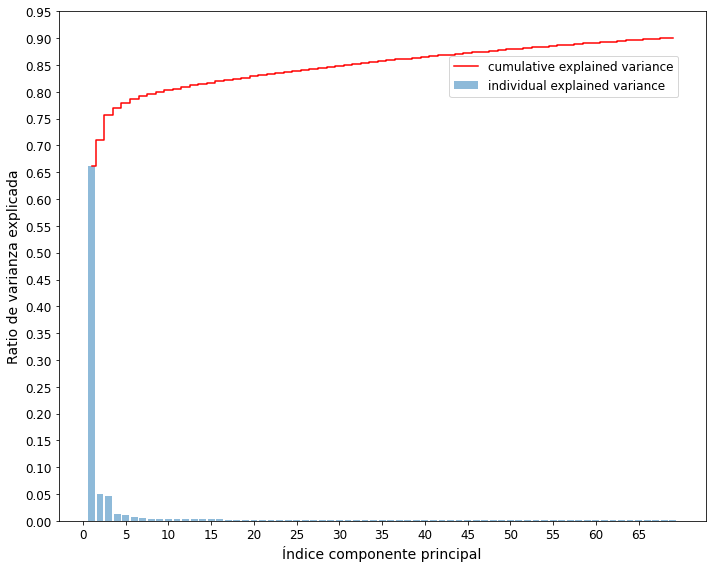

In [ ]:
indice = 69
ax=plt.figure(figsize=(10,8))
plt.bar(range(1, indice+1), varianza_explicada_em[:indice], alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, indice+1), varianza_acumulada_em[:indice], where='mid',c='r', label='cumulative explained variance')
plt.ylabel('Ratio de varianza explicada',fontsize=14)
plt.xlabel('Índice componente principal',fontsize=14)
plt.yticks((np.arange(0, 1, step=0.05)),size=12)
plt.xticks((np.arange(0, 70, step=5)),size=12)

ax.legend(loc='best', bbox_to_anchor=(0.45, 0.4, 0.5, 0.5),prop={"size":12})

plt.tight_layout()

plt.show()

In [ ]:
X_pca_em.shape

(3003, 69)

Codificamos las subclases con **LabelEncoder**

In [ ]:

# Label encoding with sklearn's LabelEncoder para las subclases SDSS
cod_subclases_em = LabelEncoder()
cod_subclases = cod_subclases_em.fit_transform(subclases)
cod_subclases

array([13,  7, 13, ..., 10,  5,  7])

In [ ]:

# Label encoding with sklearn's LabelEncoder para subclases catálogo
cod_subclases_em_2 = LabelEncoder()
cod_subclases_c = cod_subclases_em_2.fit_transform(subclases_c)
cod_subclases_c

array([4, 4, 8, ..., 3, 0, 2])

In [ ]:
# reverse mapping
cod_subclases_em.inverse_transform(cod_subclases)

array(['M8', 'M2', 'M8', ..., 'M5', 'M0', 'M2'], dtype=object)

In [ ]:
# reverse mapping
cod_subclases_em_2.inverse_transform(cod_subclases_c)

array(['M4', 'M4', 'M8', ..., 'M3', 'M0', 'M2'], dtype=object)

<br>
<br>

In [ ]:
cod_subclases_em.classes_

array(['BR', 'Ca', 'K5', 'K7', 'L0', 'M0', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9'], dtype=object)

In [ ]:
correspondencia = dict(zip(cod_subclases_em.classes_,range(0,len(cod_subclases_em.classes_))))
correspondencia 

{'BR': 0,
 'Ca': 1,
 'K5': 2,
 'K7': 3,
 'L0': 4,
 'M0': 5,
 'M1': 6,
 'M2': 7,
 'M3': 8,
 'M4': 9,
 'M5': 10,
 'M6': 11,
 'M7': 12,
 'M8': 13,
 'M9': 14}

### Comparación subclases espectrales catalogo y SDSS

Creamos un dataset con las 10 primeras componentes. añadiremos una columna para las subclases de SDSS y el otro para las del catálago Sacheva

In [ ]:
df_enanas = pd.DataFrame(data=X_pca_em[:,:10])
df_enanas['subclase']=subclases
df_enanas['subclase_c']=subclases_c
df_enanas.head(3)

,0,1,2,3,4,5,6,7,8,9,subclase,subclase_c
0,56.123232,-13.718092,1.006009,-2.658259,-1.757399,-3.282880,-0.436069,-2.621238,1.842283,3.285944,M8,M4
1,0.064512,6.027093,-1.785854,-0.082030,-4.978118,-0.247834,0.150650,0.313341,-0.751620,0.558204,M2,M4
2,57.699654,-11.140807,11.572558,0.508988,2.014200,-6.580554,-6.960354,-2.162979,1.494101,-3.979177,M8,M8


Calculamos los centroides para cada subclase

In [ ]:
df_clases_enanas = df_enanas.groupby('subclase').mean()
df_clases_enanas

,0,1,2,3,4,5,6,7,8,9
subclase,,,,,,,,,,
BR,-38.218591,-11.211396,2.761509,-2.653412,8.181230,5.475642,4.515513,-1.397970,-0.722306,-1.031606
Ca,-33.558102,-4.562579,-1.534258,-8.304898,5.457307,-0.644828,-4.295230,-0.216092,-3.115260,1.051861
K5,-45.481630,-7.248905,14.709457,2.330968,5.033837,1.399755,1.799901,0.984559,1.941193,-2.311779
K7,-37.619146,-9.283876,3.400195,-0.514665,1.215578,0.286477,0.920622,-0.184080,0.640206,-0.269800
L0,50.924211,10.515577,61.045198,5.183722,16.180519,18.109978,1.030673,13.926798,3.184204,-4.389392
M0,-22.443943,-1.164619,2.278442,-1.844534,-0.682806,0.006381,-0.224678,-0.086175,-0.018490,-0.057597
M1,-11.115135,-0.888804,-1.701518,0.931352,1.211353,-0.195390,0.170640,0.223200,0.141310,0.052354
M2,1.255117,4.911024,-0.603227,1.474811,-0.454179,-0.119774,0.222707,0.161088,-0.036495,0.074430
M3,10.394830,2.781983,-5.052864,1.764129,1.569658,0.017403,0.377617,0.022587,-0.082700,0.205589


In [ ]:
df_clases_c_enanas = df_enanas.groupby('subclase_c').mean()
df_clases_c_enanas

,0,1,2,3,4,5,6,7,8,9
subclase_c,,,,,,,,,,
M0,-24.913945,-4.951535,0.793882,-0.388922,1.268027,0.349907,0.379571,0.032243,0.214326,-0.087262
M1,-13.880744,-1.173070,-0.179933,-0.115129,0.703519,0.288162,0.020371,-0.024207,-0.019692,0.030371
M2,-2.893035,1.719789,-1.590650,0.341582,0.434333,0.022350,-0.141619,0.198364,-0.174635,0.148717
M3,5.999581,3.566699,-1.615089,0.560115,-0.393508,-0.348820,-0.064860,-0.034698,-0.295540,0.002295
M4,18.178685,3.609600,-0.135094,0.276004,-1.215849,-0.211113,-0.058739,-0.210280,-0.078602,0.220506
M5,31.270784,1.417078,1.815899,-0.379236,-2.065722,0.258559,0.064485,0.208497,-0.015481,0.162793
M6,41.263648,-1.070555,3.882162,-0.663002,-1.806960,-0.803046,-0.369396,-0.290192,0.467209,-0.663918
M7,49.173922,-3.913250,5.944388,-0.853505,-1.706274,-1.120037,-1.195651,-0.257703,0.553652,-0.419611
M8,54.065042,-6.140373,6.322437,-1.661915,-3.156263,-0.343448,-0.175084,-0.312685,1.409567,-0.908564


Creaos un nuevo mapa de color

In [ ]:
color_g = cm.get_cmap('gnuplot2',len(df_clases_enanas)+1)

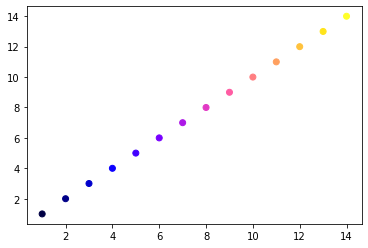

In [ ]:
x = np.arange(1,len(df_clases_enanas))
newcolors=color_g(x)
mapa_color=ListedColormap(newcolors)
plt.scatter(x,x,cmap= mapa_color, c=x)

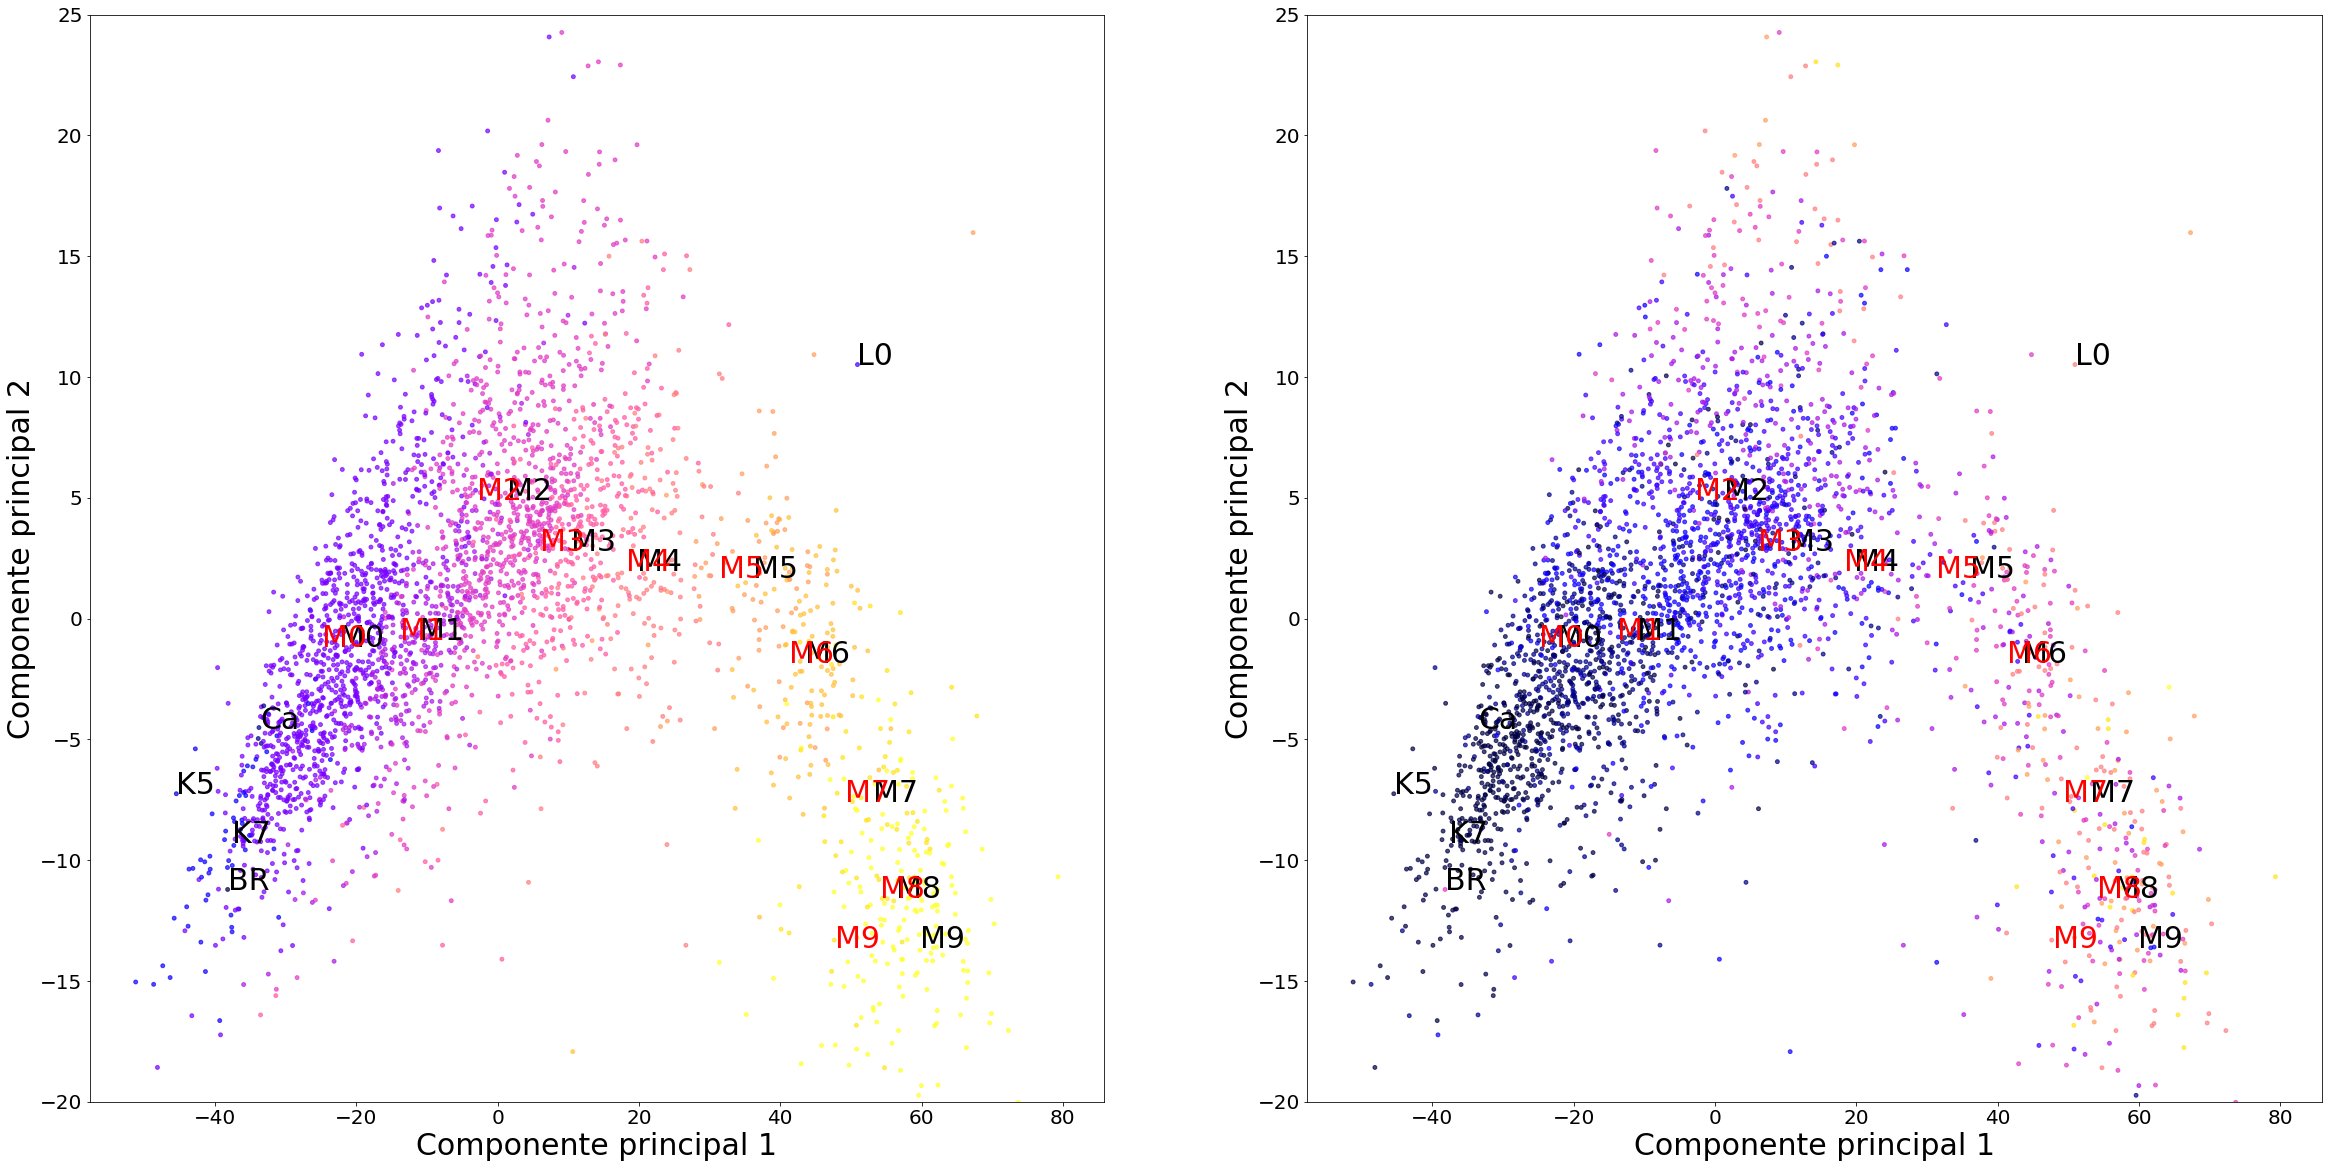

In [ ]:
comp =0
comp_aux =1

fig, ax = plt.subplots(1,2,figsize=(40,20))
#Representamos los objetos en función de sus clases para las dos clasificaciones
ax[0].scatter(X_pca_em[:,comp], X_pca_em[:,comp_aux] , cmap=mapa_color,s=15,c=cod_subclases,alpha=0.7)
ax[1].scatter(X_pca_em[:,comp], X_pca_em[:,comp_aux] , cmap=mapa_color,s=15,c=cod_subclases_c,alpha=0.7)
for clase in df_clases_enanas.index:
  ax[0].text(df_clases_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=30,c='black') 
  ax[1].text(df_clases_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=30,c='black')
for clase in df_clases_c_enanas.index:
  ax[0].text(df_clases_c_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=30,c='r') 
  ax[1].text(df_clases_c_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=30,c='r')

for a in ax:
  a.set_ylim(-20,25)
  a.set_xlabel('Componente principal '+str(comp+1),fontsize=30)
  a.set_ylabel('Componente principal '+str(comp_aux+1),fontsize=30)
  k=a.get_yticks()
  a.tick_params(labelsize=20)
  #a.set_xticks(size=12)


plt.show()


### Comparación centroides subclases SDSS con plantillas

Aplicamos la estandarización y la transformación PCA obtenida de la muestra de EM a las plantillas

In [ ]:
e_m_flujos_p= sc_em.transform(flujos_p)
X_pca_p_to_EM = estimator_em.transform(e_m_flujos_p)
X_pca_p_to_EM.shape

(30, 69)

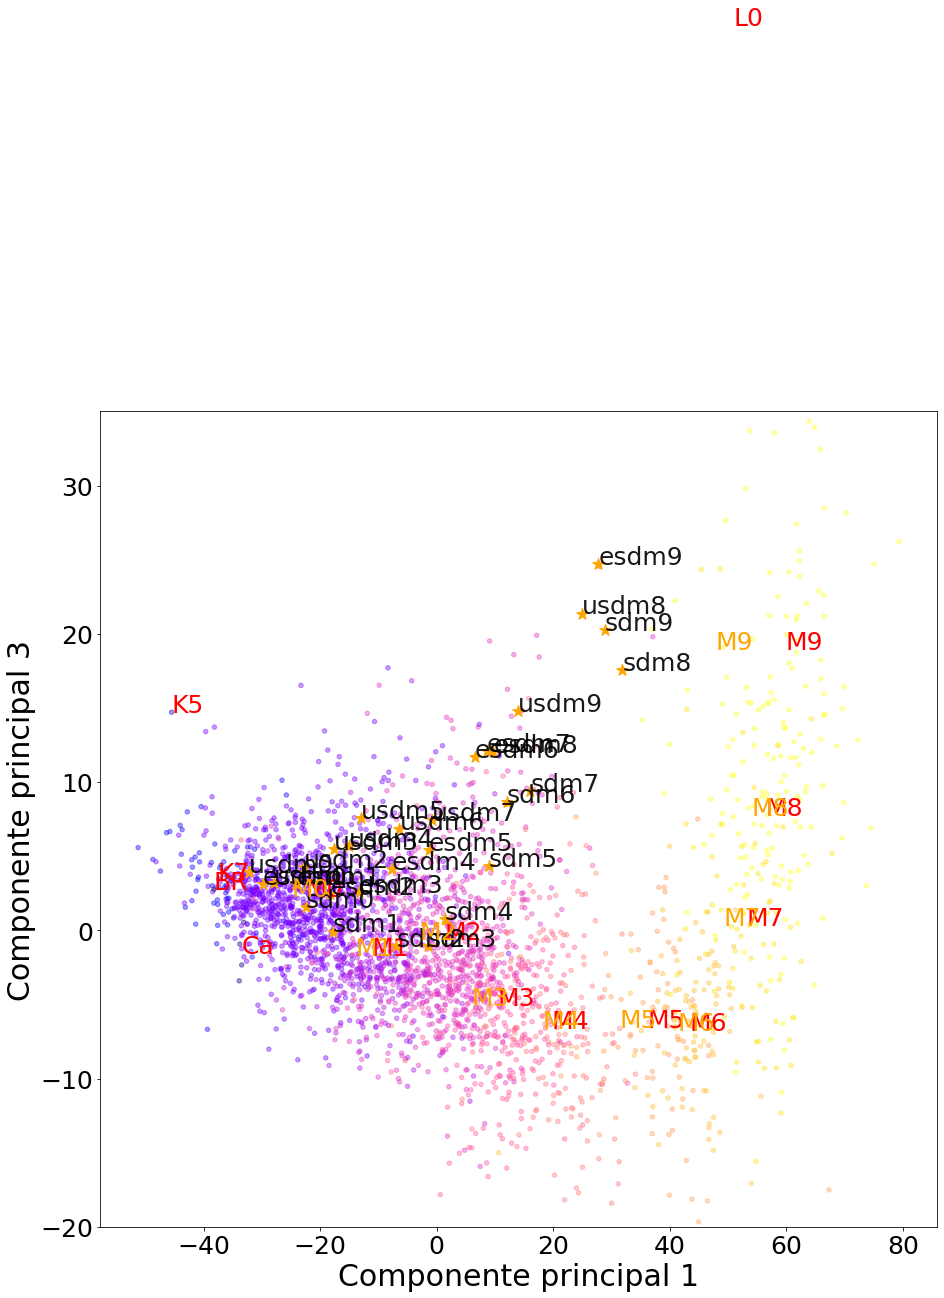

In [ ]:
comp =0
comp_aux =2
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X_pca_em[:,comp], X_pca_em[:,comp_aux] , cmap=mapa_color,s=20,c=cod_subclases,alpha=0.4)

for clase in df_clases_enanas.index:
  ax.text(df_clases_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=25,c='r') 
for i, plantilla in enumerate(subclases_m):
  ax.text(X_pca_p_to_EM[i,comp],X_pca_p_to_EM[i,comp_aux],plantilla,size=25,c='black',alpha=0.9)
  ax.scatter(X_pca_p_to_EM[i,comp],X_pca_p_to_EM[i,comp_aux],s=150, marker='*',c='orange')
for clase in df_clases_c_enanas.index:
  ax.text(df_clases_c_enanas.loc[clase][comp], df_clases_enanas.loc[clase][comp_aux], clase,size=25,c='orange')

ax.set_ylim(-20,35)
ax.set_xlabel('Componente principal '+str(comp+1),fontsize=30)
ax.set_ylabel('Componente principal '+str(comp_aux+1),fontsize=30)
ax.tick_params(labelsize=25)


Veamos tres componentes

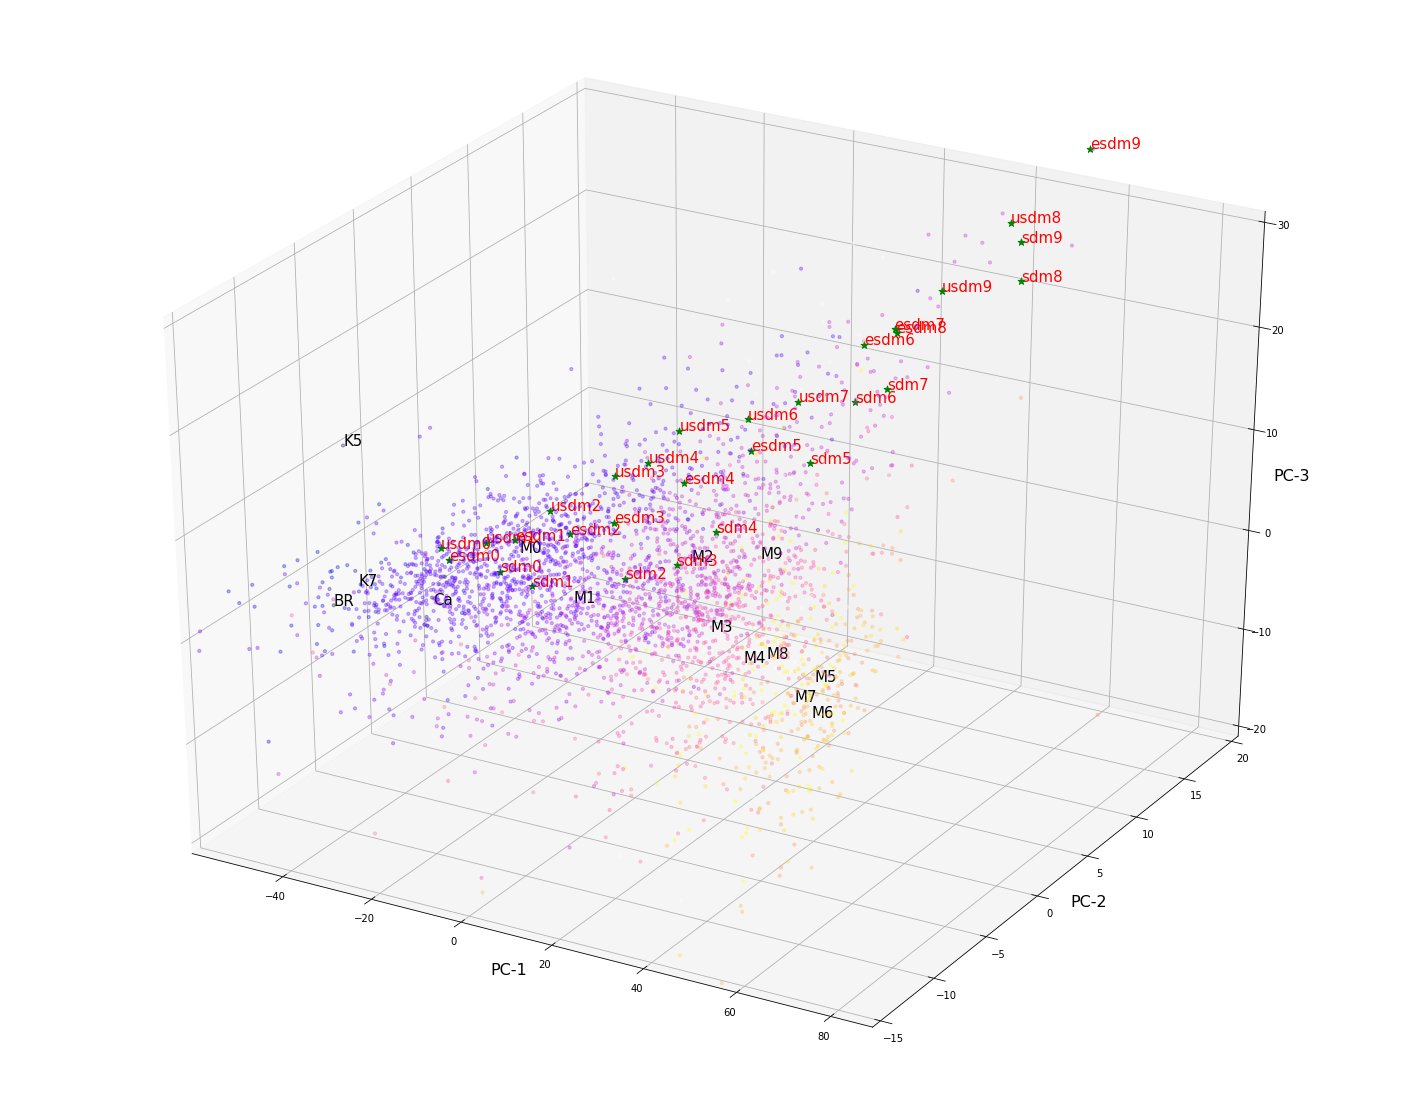

In [ ]:
labels=cod_subclases

fig=plt.figure(figsize = (25, 20))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X_pca_em[:,0], X_pca_em[:,1],X_pca_em[:,2], cmap='gnuplot2' ,s=10,c=labels,alpha=0.3)
for clase in df_clases_enanas.index:
    ax.text(df_clases_enanas.loc[clase][0], df_clases_enanas.loc[clase][1],df_clases_enanas.loc[clase][2],\
            clase,size=15) 
for i, plantilla in enumerate(subclases_m):
  ax.text(X_pca_p_to_EM[i,0],X_pca_p_to_EM[i,1],X_pca_p_to_EM[i,2],plantilla,size=15,c='red',alpha=1)
  ax.scatter(X_pca_p_to_EM[i,0],X_pca_p_to_EM[i,1],X_pca_p_to_EM[i,2],s=50, marker='*',c='green')
ax.set_xlabel('PC-1',fontsize=16)
ax.set_ylabel('PC-2',fontsize=16)
ax.set_zlabel('PC-3',fontsize=16)
#ax.set_xlim3d(-1.0, 1.2)
ax.set_ylim3d( -15, 20)
ax.set_zlim3d(-20, 30)
plt.show()

Vemos que hay valores que parecen ser outliers

Nos quedamos en principio con los componentes principales que representan el 90% de la varianza. Esto tal cual no funciona debido a tener demasiadas dimensiones. Al final las pequeñas variaciones de la gran cantidad de dimensiones hace que pierdan pesos las distancias en las componentes principales.

In [ ]:
indices_componentes_em = np.where(varianza_acumulada_em<=0.7)
len(indices_componentes_em[0])

1

In [ ]:
EM_PCA_ = X_pca_em[:,:283]
EM_PCA_.shape

(3003, 69)

## Análisis PCA Plantillas

Estandarizamos los flujos para cada longitud de onda en las plantillas.

In [ ]:
flujos_p.shape

(30, 1000)

In [ ]:
sc_p = StandardScaler()
e_flujos_p = sc_p.fit_transform(flujos_p)
e_p_flujos_DB = sc_p.transform(flujos_BD)#aplicamos la misma transformación a las EM
e_flujos_p.shape

(30, 1000)

In [ ]:
estimator_p = PCA(n_components = 10)
X_pca_p = estimator_p.fit_transform(e_flujos_p)

varianza_explicada_p = estimator_p.explained_variance_ratio_

In [ ]:
varianza_explicada_p.shape

(10,)

In [ ]:
varianza_explicada_p[:20]


array([0.7844874 , 0.08435052, 0.03634967, 0.0279261 , 0.01493992,
       0.01073388, 0.00901852, 0.00744271, 0.00529956, 0.00446897])

In [ ]:
varianza_acumulada_p = np.cumsum(varianza_explicada_p)
varianza_acumulada_p[:10]

array([0.7844874 , 0.86883792, 0.90518759, 0.93311369, 0.94805361,
       0.95878749, 0.967806  , 0.97524871, 0.98054827, 0.98501724])

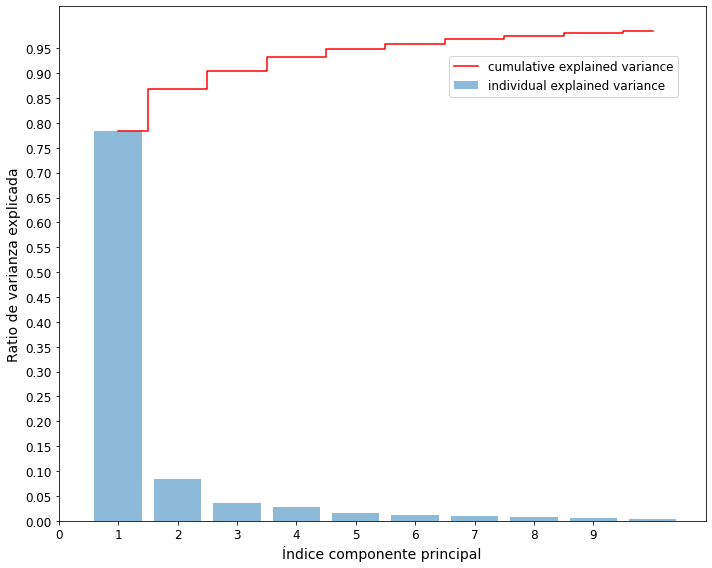

In [ ]:
indice = 10
ax=plt.figure(figsize=(10,8))
plt.bar(range(1, indice+1), varianza_explicada_p[:indice], alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, indice+1), varianza_acumulada_p[:indice], where='mid',c='r', label='cumulative explained variance')
plt.ylabel('Ratio de varianza explicada',fontsize=14)
plt.xlabel('Índice componente principal',fontsize=14)
plt.yticks((np.arange(0, 1, step=0.05)),size=12)
plt.xticks((np.arange(0, indice, step=1)),size=12)

ax.legend(loc='best', bbox_to_anchor=(0.45, 0.4, 0.5, 0.5),prop={"size":12})

plt.tight_layout()

plt.show()

In [ ]:
subclases_m

array(['usdm0', 'usdm1', 'usdm2', 'usdm3', 'usdm4', 'usdm5', 'usdm6',
       'usdm7', 'usdm8', 'usdm9', 'esdm0', 'esdm1', 'esdm2', 'esdm3',
       'esdm4', 'esdm5', 'esdm6', 'esdm7', 'esdm8', 'esdm9', 'sdm0',
       'sdm1', 'sdm2', 'sdm3', 'sdm4', 'sdm5', 'sdm6', 'sdm7', 'sdm8',
       'sdm9'], dtype=object)

Codificamos las clases con **LabelEncoder**

In [ ]:

# Label encoding with sklearn's LabelEncoder
cod_subclases_p = LabelEncoder()
cod_subclases_p = cod_subclases_p.fit_transform(subclases_m)
cod_subclases_p

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Text(0, 0.5, 'Componente principal 3')

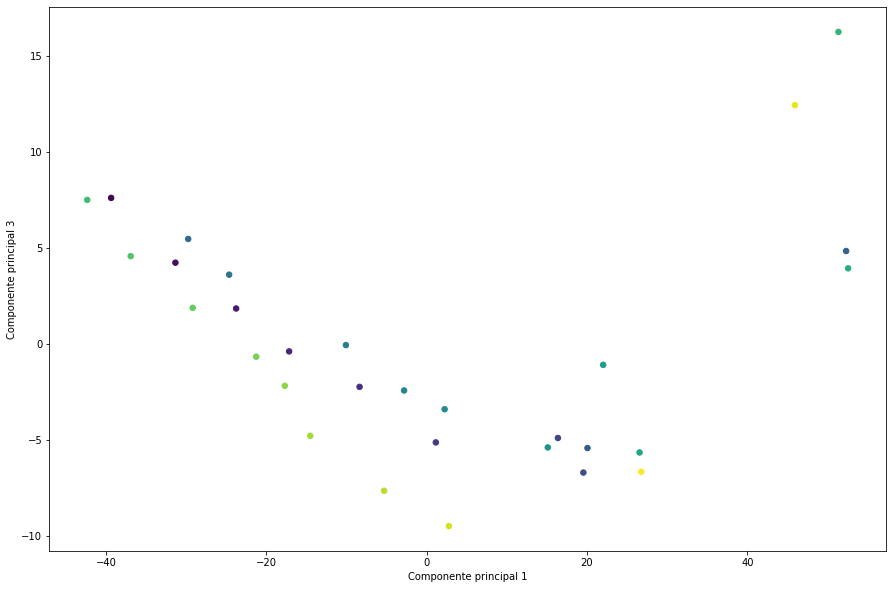

In [ ]:
comp = 0
comp_aux =2
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(X_pca_p[:,comp], X_pca_p[:,comp_aux] ,s=30,c=cod_subclases_p)
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal '+str(comp_aux+1))


Veamos en este caso los componentes principales que representan el 95% de la varianza

In [ ]:
indices_componentes_p = np.where(varianza_acumulada_p<0.95)
len(indices_componentes_p[0])

5

### Comparación centroides subclases SDSS con plantillas

Vamos a hacer lo contrario. Proyectar el espacio de las Enanas marrones en los autovectores del análisis PCA de las plantillas

In [ ]:
X_pca_EM_to_p = estimator_p.transform(e_p_flujos_DB)
X_pca_EM_to_p.shape

(3003, 10)

Nos quedamos con las 5 primeras componentes

In [ ]:
#Componentes pantillas
P_PCA = X_pca_p[:,:5]
P_PCA.shape

(30, 5)

In [ ]:
#Componentes subenanas
df_enanas_to_p = pd.DataFrame(data=X_pca_EM_to_p[:,:5])
df_enanas_to_p['subclase']=subclases
df_enanas_to_p['subclase_c']=subclases_c
df_enanas_to_p['clase_metalicidad']=df_subenanas['clase_metalicidad']
df_enanas_to_p.head(3)

,0,1,2,3,4,subclase,subclase_c,clase_metalicidad
0,63.316081,-88.767421,4.984568,12.208492,2.709321,M8,M4,sdM
1,-1.432955,-17.498327,-6.664743,-2.603872,-3.852450,M2,M4,sdM
2,72.777703,-65.337577,19.409215,11.781240,6.971219,M8,M8,sdM


In [ ]:
df_clases_enanas_to_p = df_enanas_to_p.groupby('subclase').mean()
df_clases_enanas_to_p

,0,1,2,3,4
subclase,,,,,
BR,-53.494483,-5.602894,9.176128,5.226413,0.778341
Ca,-44.993723,5.344710,3.010705,2.126111,0.940525
K5,-53.600771,20.404698,24.004589,3.202890,3.058280
K7,-50.319974,3.619057,11.410094,1.301532,1.474065
L0,88.243036,11.163667,43.417685,-1.425367,22.642625
M0,-29.662692,-1.081457,3.867590,0.767971,-0.036374
M1,-16.179830,-16.139030,2.215298,1.386514,-2.392161
M2,1.405668,-19.982435,-1.853903,1.207350,-3.225797
M3,10.904451,-36.119285,-3.832178,2.642050,-5.179934


In [ ]:
df_clases_c_enanas_to_p = df_enanas_to_p.groupby('subclase_c').mean()
df_clases_c_enanas_to_p

,0,1,2,3,4
subclase_c,,,,,
M0,-33.914453,-5.418828,6.689063,1.247751,-0.529405
M1,-19.351781,-12.160390,2.644522,1.187160,-1.744059
M2,-5.229087,-20.526368,-0.744681,1.587954,-2.712382
M3,6.403732,-26.847402,-2.610546,2.135844,-3.398326
M4,21.991736,-36.717850,-3.104046,3.076722,-3.145843
M5,38.075741,-49.489680,-2.321917,3.241630,-2.981484
M6,50.295858,-58.994325,0.636355,6.276085,-1.595517
M7,60.182939,-66.219757,2.868521,8.565567,-0.639564
M8,65.187773,-72.912019,5.465259,8.632728,-2.547048


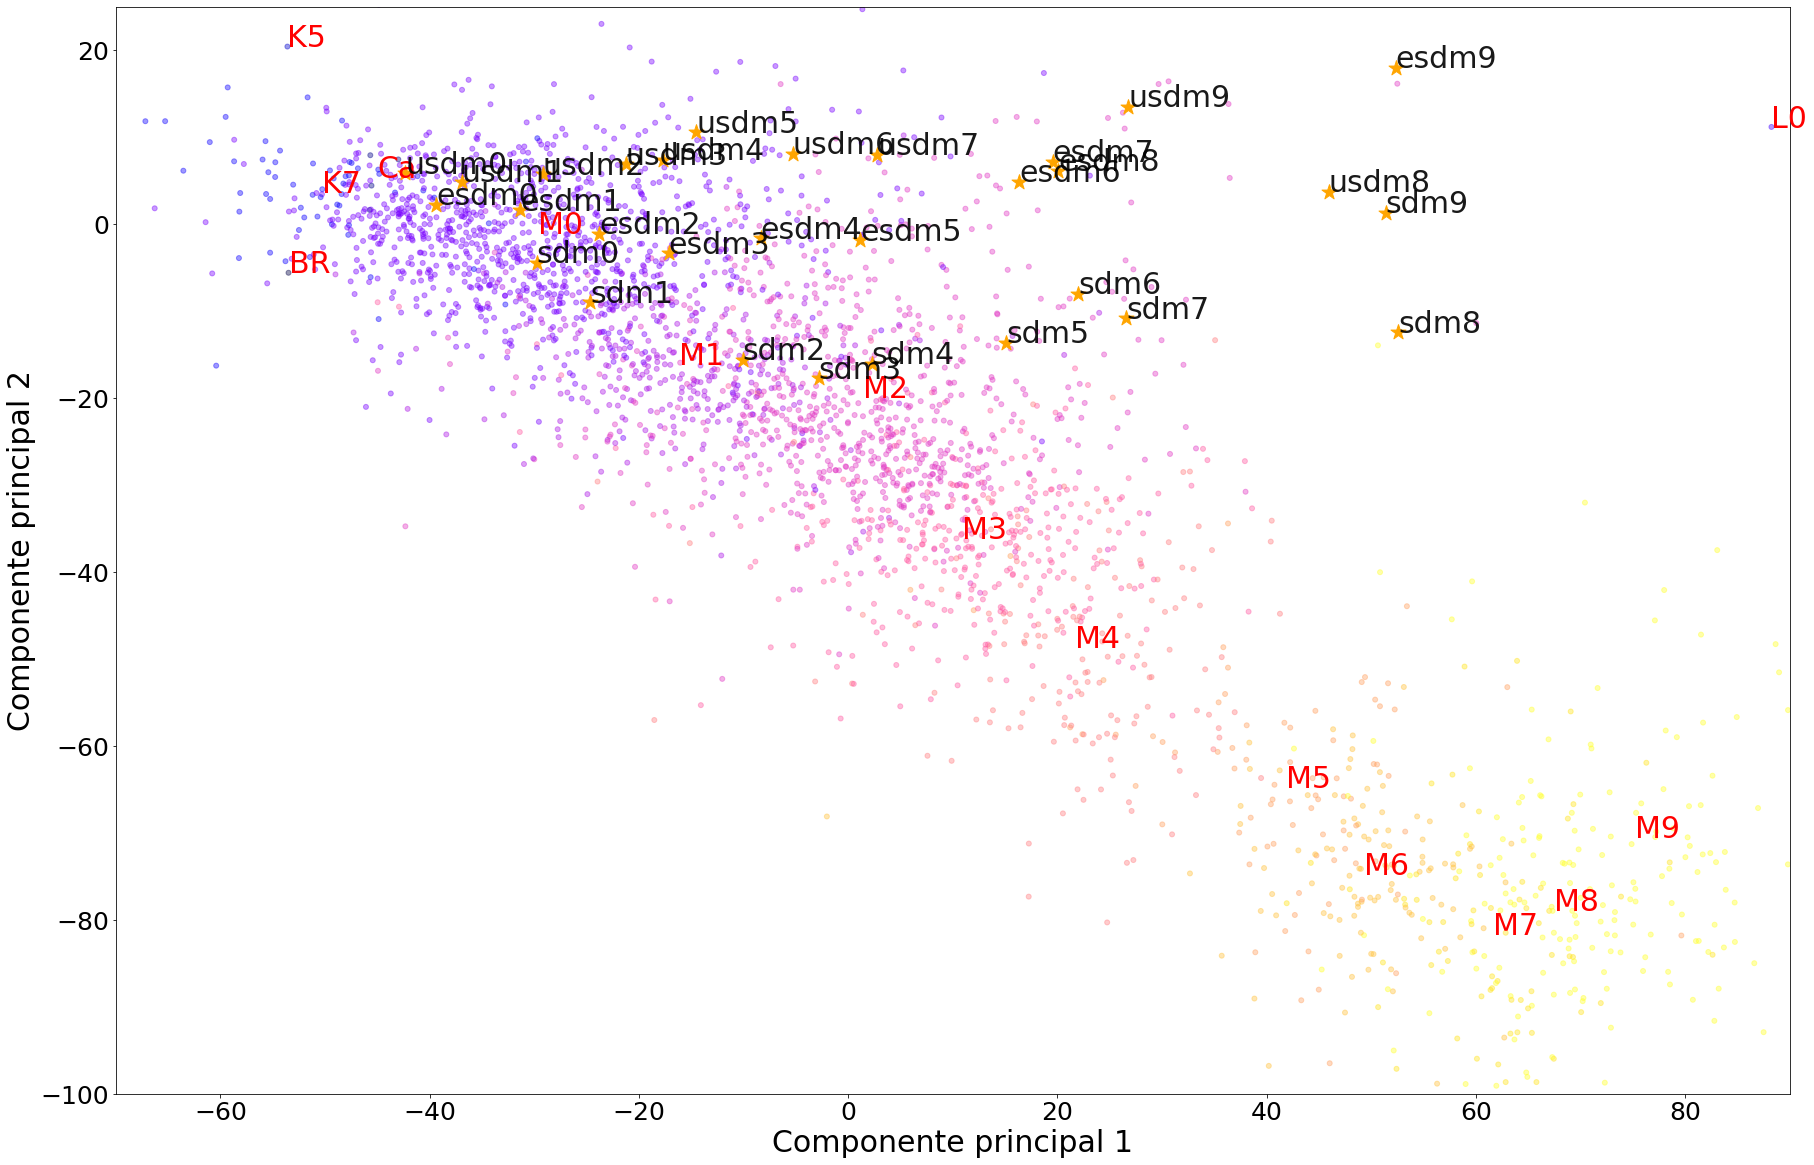

In [ ]:
comp =0
comp_aux =1
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(X_pca_EM_to_p[:,comp], X_pca_EM_to_p[:,comp_aux] , cmap=mapa_color,s=25,c=cod_subclases,alpha=0.4)

for clase in df_clases_enanas_to_p.index:
  ax.text(df_clases_enanas_to_p.loc[clase][comp], df_clases_enanas_to_p.loc[clase][comp_aux], clase,size=30,c='r') 
for i, plantilla in enumerate(subclases_m):
  ax.text(X_pca_p[i,comp],X_pca_p[i,comp_aux],plantilla,size=30,c='black',alpha=0.9)
  ax.scatter(X_pca_p[i,comp],X_pca_p[i,comp_aux],s=250, marker='*',c='orange')
#for clase in df_clases_c_enanas_to_p.index:
#  ax.text(df_clases_c_enanas_to_p.loc[clase][comp], df_clases_enanas_to_p.loc[clase][comp_aux], clase,size=30,c='g')

ax.set_xlim(-70,90)
ax.set_ylim(-100,25)
ax.set_xlabel('Componente principal '+str(comp+1),fontsize=30)
ax.set_ylabel('Componente principal '+str(comp_aux+1),fontsize=30)
ax.tick_params(labelsize=25)


### Comparación centroides SDSS-metalicidad con plantillas

Vamos a hacer lo contrario. Proyectar el espacio de las Enanas marrones en los autovectores del análisis PCA de las plantillas

In [ ]:
df_clases_m_enanas_to_p = df_enanas_to_p.groupby(['subclase','clase_metalicidad']).mean()
df_clases_m_enanas_to_p

0          1          2          3  \
subclase clase_metalicidad                                               
BR       sdM               -53.494483  -5.602894   9.176128   5.226413   
Ca       sdM               -44.993723   5.344710   3.010705   2.126111   
K5       sdM               -53.600771  20.404698  24.004589   3.202890   
K7       esdM              -50.017549   2.810821  10.096616   1.088036   
         sdM               -50.892294   3.845198  11.896235   1.415833   
         usdM              -44.694372   5.528634  12.971121   1.096598   
L0       sdM                88.243036  11.163667  43.417685  -1.425367   
M0       dM                -41.531689  -5.494113  12.250870  -1.155904   
         esdM              -26.141032   0.586090   2.064348   0.606573   
         sdM               -33.531078  -4.664831   6.139967   1.092258   
         usdM              -26.761818   4.550140   1.603756   0.343428   
M1       dM                -42.544068 -11.477669  13.039719  -1.981449   
         esdM              -17.786731 -15.931000   3.130191   1.495356   
         sdM               -15.505004 -16.145757   1.905730   1.393848   
         usdM              -14.843862 -20.147028   0.956876   2.187498   
M2       dM                  2.010760 -17.109654   0.044212  10.061928   
         esdM                1.312970  -8.639195  -2.366345   0.284253   
         sdM                 1.540740 -22.983482  -1.755590   1.510100   
         usdM               -1.195281 -14.835484  -1.313478  -0.916519   
M3       dM                 14.006627 -41.750073  -5.548245  -1.627660   
         esdM                9.619275 -38.950104  -5.561866   2.738678   
         sdM                11.308079 -35.900427  -3.622281   2.630727   
         usdM                4.308056 -31.709281  -3.320925   3.039422   
M4       esdM               21.641224 -43.221179  -4.827278   3.971449   
         sdM                22.299891 -49.985463  -5.763317   3.235450   
         usdM                8.346379 -46.209029   0.659723  -2.369168   
M5       dM                 44.388642 -63.708320  -5.626914   4.403193   
         esdM               37.245795 -51.204600  -3.542397   6.091992   
         sdM                42.046510 -65.632922  -7.361737   4.611495   
         usdM               42.248506 -57.897287  -3.040256  10.535067   
M6       dM                 47.913975 -74.927905  -3.497529   9.014165   
         esdM               34.982057 -74.083463  -5.323932   0.454662   
         sdM                50.055908 -74.845015  -6.920445   6.076977   
M7       esdM               69.773383 -84.733336   2.092022   4.581234   
         sdM                60.723840 -81.335929   2.012649   8.513722   
M8       esdM               65.294008 -78.906158   7.695623   9.029091   
         sdM                67.978162 -79.173433   8.586252   8.479424   
         usdM               57.864442 -70.958200  10.685832   3.217051   
M9       esdM               76.091109 -79.403815  11.768257  10.785761   
         sdM                74.990348 -69.495148  15.458150  10.403469   
         usdM               82.811852 -80.558463   8.818130   9.124138   

                                    4  
subclase clase_metalicidad             
BR       sdM                 0.778341  
Ca       sdM                 0.940525  
K5       sdM                 3.058280  
K7       esdM                1.305736  
         sdM                 1.442541  
         usdM                2.893849  
L0       sdM                22.642625  
M0       dM                  0.007099  
         esdM                0.316873  
         sdM                -0.756771  
         usdM                1.034636  
M1       dM                 -1.774825  
         esdM               -2.251801  
         sdM                -2.428991  
         usdM               -2.401874  
M2       dM                 -1.501244  
         esdM               -1.840561  
         sdM                -3.518551  
         usdM               -4.342173  
M3       dM  

In [ ]:
df_clases_m_enanas_to_p.loc[('BR', 'sdM')]

0   -53.494483
1    -5.602894
2     9.176128
3     5.226413
4     0.778341
Name: (BR, sdM), dtype: float64

In [ ]:
#Nos quedamos solo con aquellas que SDSS ha clasificado como de clase M y las hemos asignado como de baja metalicidad
indices = df_clases_m_enanas_to_p.index
indices = [x for x in indices if x[0][0] is 'M']
indices = [x for x in indices if x[1][0] is not 'd']
indices

[('M0', 'esdM'),
 ('M0', 'sdM'),
 ('M0', 'usdM'),
 ('M1', 'esdM'),
 ('M1', 'sdM'),
 ('M1', 'usdM'),
 ('M2', 'esdM'),
 ('M2', 'sdM'),
 ('M2', 'usdM'),
 ('M3', 'esdM'),
 ('M3', 'sdM'),
 ('M3', 'usdM'),
 ('M4', 'esdM'),
 ('M4', 'sdM'),
 ('M4', 'usdM'),
 ('M5', 'esdM'),
 ('M5', 'sdM'),
 ('M5', 'usdM'),
 ('M6', 'esdM'),
 ('M6', 'sdM'),
 ('M7', 'esdM'),
 ('M7', 'sdM'),
 ('M8', 'esdM'),
 ('M8', 'sdM'),
 ('M8', 'usdM'),
 ('M9', 'esdM'),
 ('M9', 'sdM'),
 ('M9', 'usdM')]

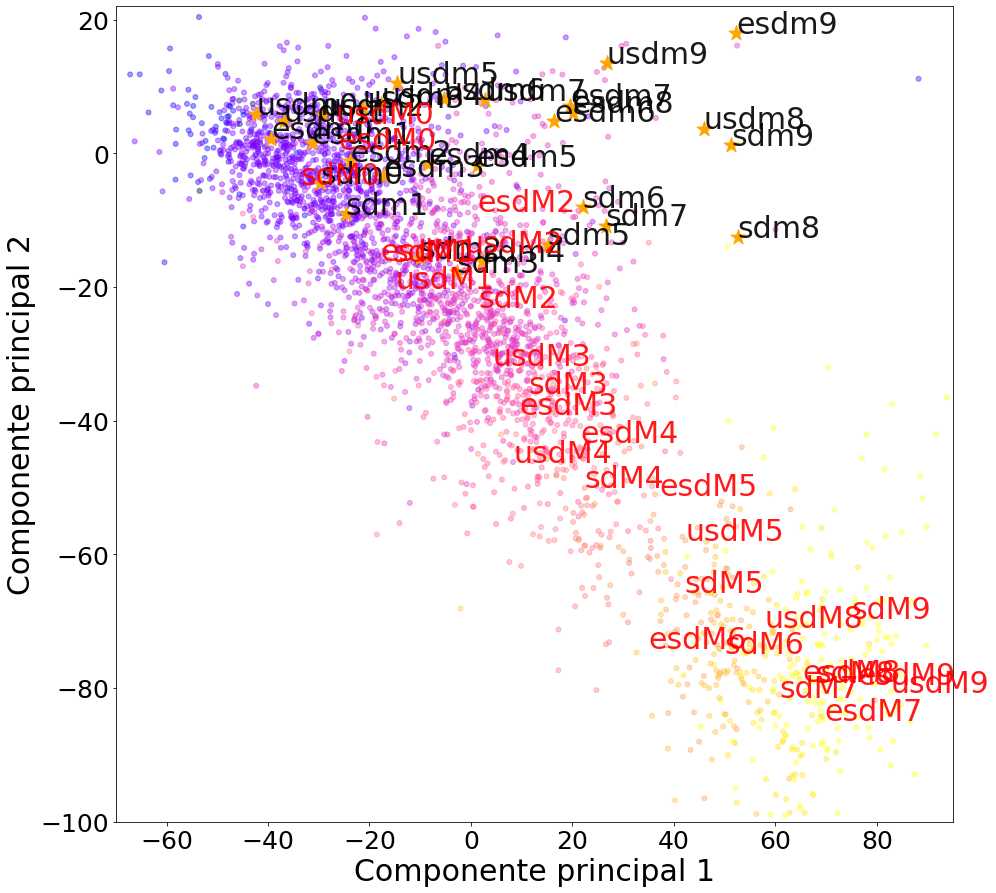

In [ ]:
comp =0
comp_aux =1
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X_pca_EM_to_p[:,comp], X_pca_EM_to_p[:,comp_aux] , cmap=mapa_color,s=25,c=cod_subclases,alpha=0.4)

#for clase in df_clases_enanas_to_p.index:
  #ax.text(df_clases_enanas_to_p.loc[clase][comp], df_clases_enanas_to_p.loc[clase][comp_aux], clase,size=30,c='r') 
for i, plantilla in enumerate(subclases_m):
  ax.text(X_pca_p[i,comp],X_pca_p[i,comp_aux],plantilla,size=30,c='black',alpha=0.9)
  ax.scatter(X_pca_p[i,comp],X_pca_p[i,comp_aux],s=250, marker='*',c='orange')

for k in indices:
  ax.text(df_clases_m_enanas_to_p.loc[k,comp],df_clases_m_enanas_to_p.loc[k,comp_aux],k[1]+k[0][1],size=30,c='red',alpha=0.9)

ax.set_xlim(-70,95)
ax.set_ylim(-100,22)
ax.set_xlabel('Componente principal '+str(comp+1),fontsize=30)
ax.set_ylabel('Componente principal '+str(comp_aux+1),fontsize=30)
ax.tick_params(labelsize=25)


### Comparación componentes principales. 

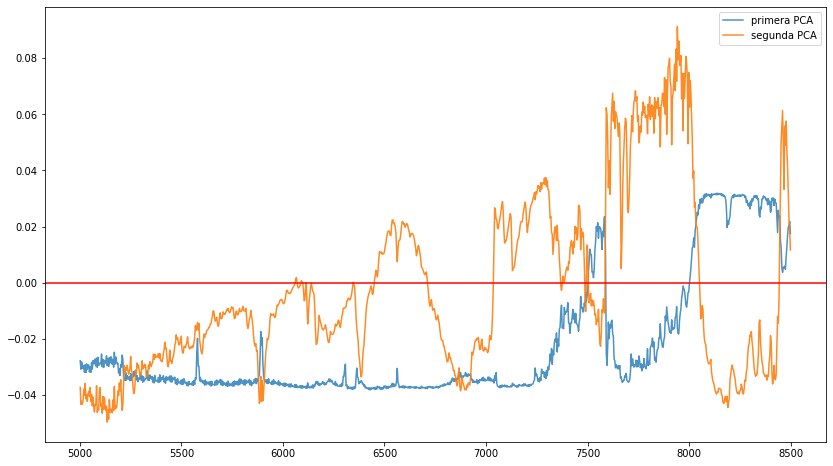

In [ ]:
componente_PCA = estimator_em.components_[0,:]
componente_PCA_1 = estimator_em.components_[1,:]
componente_PCA_2 = estimator_em.components_[2,:]
plt.figure(figsize=(14,8))
plt.plot(long_onda, componente_PCA,alpha=0.8, label='primera PCA')
plt.plot(long_onda, componente_PCA_1,alpha=0.9, label='segunda PCA')
#plt.plot(long_onda, componente_PCA_2,alpha=0.9, label='tercera PCA')
plt.axhline(0,c='r')

plt.legend()

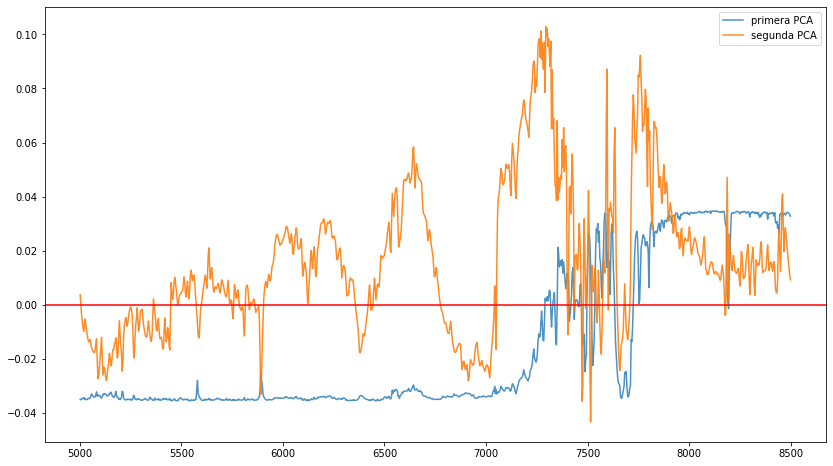

In [ ]:
componente_PCA = estimator_p.components_[0,:]
componente_PCA_1 = estimator_p.components_[1,:]
componente_PCA_2 = estimator_p.components_[2,:]

plt.figure(figsize=(14,8))
plt.plot(long_onda, componente_PCA,alpha=0.8, label='primera PCA')
plt.plot(long_onda, componente_PCA_1,alpha=0.9, label='segunda PCA')
#plt.plot(long_onda, componente_PCA_2,alpha=0.9, label='tercera PCA')
plt.axhline(0,c='r')

plt.legend()

## Estandarización conjunta muestras y plantillas

Probamos a estandarizar conjuntamente.

In [ ]:
df_em = pd.DataFrame(data=flujos_BD)
df_em['subclase']=subclases
df_em

In [ ]:
df_plantillas = pd.DataFrame(data=flujos_p)
df_plantillas['subclase']=subclases_m
df_plantillas

In [ ]:
df_em_plantillas=pd.concat([df_plantillas,df_em],axis=0, ignore_index=True)
df_em_plantillas

In [ ]:
#SC = MinMaxScaler()
SC = StandardScaler()
SC_flujos = SC.fit_transform(df_em_plantillas.drop(columns='subclase').values)

In [ ]:
estimator_p_em = PCA(n_components = None)
X_pca_p_em = estimator_p_em.fit_transform(SC_flujos)

varianza_explicada_p_em = estimator_p_em.explained_variance_ratio_

In [ ]:
varianza_explicada_p_em[:10]

array([0.4450931 , 0.17690005, 0.04232442, 0.02688851, 0.0230693 ,
       0.0114346 , 0.00966292, 0.00849937, 0.00769632, 0.00741256])

In [ ]:
varianza_acumulada_p_em = np.cumsum(varianza_explicada_p_em)
varianza_acumulada_p_em[:10]

array([0.4450931 , 0.62199315, 0.66431756, 0.69120607, 0.71427537,
       0.72570997, 0.73537288, 0.74387225, 0.75156858, 0.75898114])

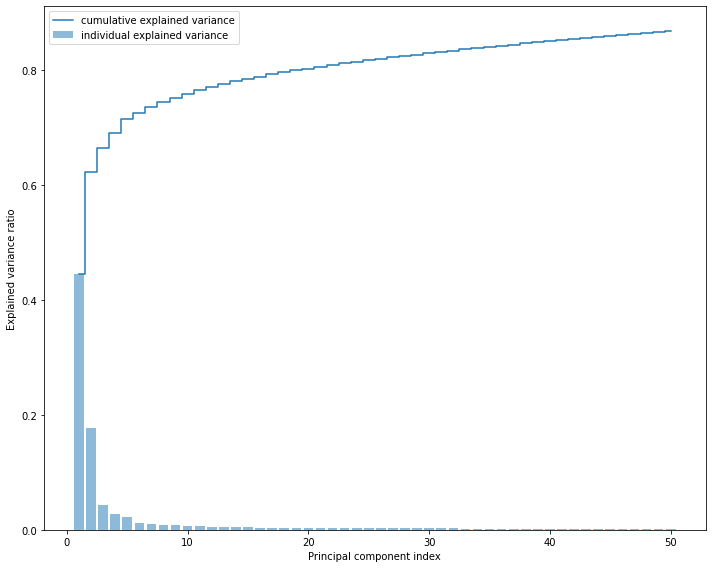

In [ ]:
indice = 50
plt.figure(figsize=(10,8))
plt.bar(range(1, indice+1), varianza_explicada_p_em[:indice], alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, indice+1), varianza_acumulada_p_em[:indice], where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [ ]:
df_em_pca_conjunta = pd.DataFrame(data=X_pca_p_em[30:,:])
df_em_pca_conjunta['subclase']=subclases
df_em_pca_conjunta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,986,987,988,989,990,991,992,993,994,995,996,997,998,999,subclase
0,43.567374,-7.330576,4.653312,-2.694083,5.803423,0.116140,-3.065556,-3.674206,0.348337,2.948055,-1.477766,0.986067,-0.686675,-2.241285,0.259664,...,1.181460e-16,1.369897e-15,-1.848346e-16,-2.633733e-16,1.284688e-15,8.830089e-16,-6.916846e-16,5.941955e-16,6.372964e-16,-7.778201e-16,9.260239e-16,1.502293e-15,-4.357702e-16,-2.907710e-15,M8
1,-6.557981,13.623957,-0.877497,-1.200916,-3.967523,-1.410367,-0.055335,-0.892105,0.786718,0.877842,0.711687,0.927480,0.406776,0.946678,-0.464164,...,5.760509e-16,-1.473489e-15,1.034982e-15,-2.754338e-15,1.026695e-15,-2.736531e-15,-3.757101e-15,-2.479868e-16,-8.258953e-16,-2.932987e-16,-3.385177e-15,2.655589e-15,-4.308664e-15,-2.060003e-15,M2V
2,54.531374,4.125579,4.176317,-1.059484,2.549226,-5.358249,-0.535779,-1.894337,0.885829,-0.159615,-5.667163,0.311600,-1.215863,6.466586,2.576532,...,1.140014e-15,-9.219196e-17,4.249665e-16,2.389251e-15,7.075143e-16,1.693604e-15,-3.594855e-15,-5.693318e-16,1.221645e-15,-6.725462e-16,-7.880597e-16,2.379485e-15,-1.110723e-16,-4.060343e-16,M8
3,-11.951194,-6.665747,5.428973,-1.605349,0.187051,-2.616547,1.817881,-0.114150,-0.079033,0.202362,0.905269,0.477213,-0.557733,0.045936,0.148769,...,-6.401907e-16,1.647570e-16,-1.639188e-16,-2.372857e-15,9.132329e-16,1.098119e-15,-1.980459e-16,-2.281204e-15,1.209845e-15,-2.944999e-15,-3.137167e-15,-2.044624e-15,3.263749e-17,-1.700758e-15,M2
4,-18.907839,10.498513,1.509212,0.060911,1.195706,1.006610,-1.106242,-1.703330,0.091509,-0.201438,-0.419868,-0.117911,-1.577962,0.013676,0.711415,...,-3.017958e-15,-4.305846e-16,-1.197513e-15,-1.815022e-15,7.293269e-16,1.980056e-15,5.217269e-16,4.032073e-16,3.879964e-15,-9.823210e-16,-2.965561e-15,-1.623588e-15,-2.672933e-15,-3.298733e-15,M0V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,-0.374253,-11.299970,0.249180,-0.194566,-1.009750,-0.280230,1.082070,1.283218,0.167895,0.637510,-0.074145,0.475740,0.641215,-1.060007,-1.215293,...,4.218842e-16,-1.302146e-15,-2.287806e-15,2.664446e-15,-3.202554e-16,2.239592e-15,-1.053209e-15,3.692975e-16,3.300673e-16,-2.063740e-15,-1.268359e-15,-5.065455e-16,1.185795e-15,-8.186294e-17,M3
3238,61.290505,11.480308,5.472695,2.361718,22.208523,2.758039,1.591420,-6.844886,-12.861004,0.885656,8.566525,-8.729583,11.204776,-3.614966,-3.160540,...,1.867250e-15,-8.647098e-16,7.374472e-17,1.557190e-15,-1.027961e-15,-6.364549e-16,3.622092e-16,1.839658e-15,-1.345498e-17,6.505837e-16,4.893606e-17,2.563820e-16,-7.584259e-16,-2.890256e-16,M8
3239,12.814666,-14.990727,-2.496927,-0.249710,-2.492625,1.499577,-0.909918,1.358298,0.264682,-1.705282,0.895899,-2.943822,1.200858,0.228906,1.258543,...,-1.683632e-15,2.083439e-15,1.172544e-15,8.373969e-16,8.038631e-16,6.279736e-16,8.839449e-16,1.121416e-15,-1.924832e-15,-2.335834e-15,-4.015625e-16,6.821433e-16,4.802169e-16,-8.059521e-16,M5
3240,-17.206112,-5.346101,4.302059,0.853618,4.436606,0.134696,-0.165863,0.396688,-0.462910,-0.065671,-0.724207,0.889560,0.188935,0.034159,-0.132818,...,-2.402473e-15,-2.172426e-15,8.769471e-16,-7.724032e-16,1.490001e-15,1.126297e-16,-1.912315e-15,1.145513e-15,2.068031e-15,-5.840756e-17,2.792266e-16,-1.143034e-15,-6.824253e-17,5.702491e-16,M0


In [ ]:
df_clases_enanas_s_conj = df_em_pca_conjunta.groupby('subclase').mean()
df_clases_enanas_s_conj

No handles with labels found to put in legend.


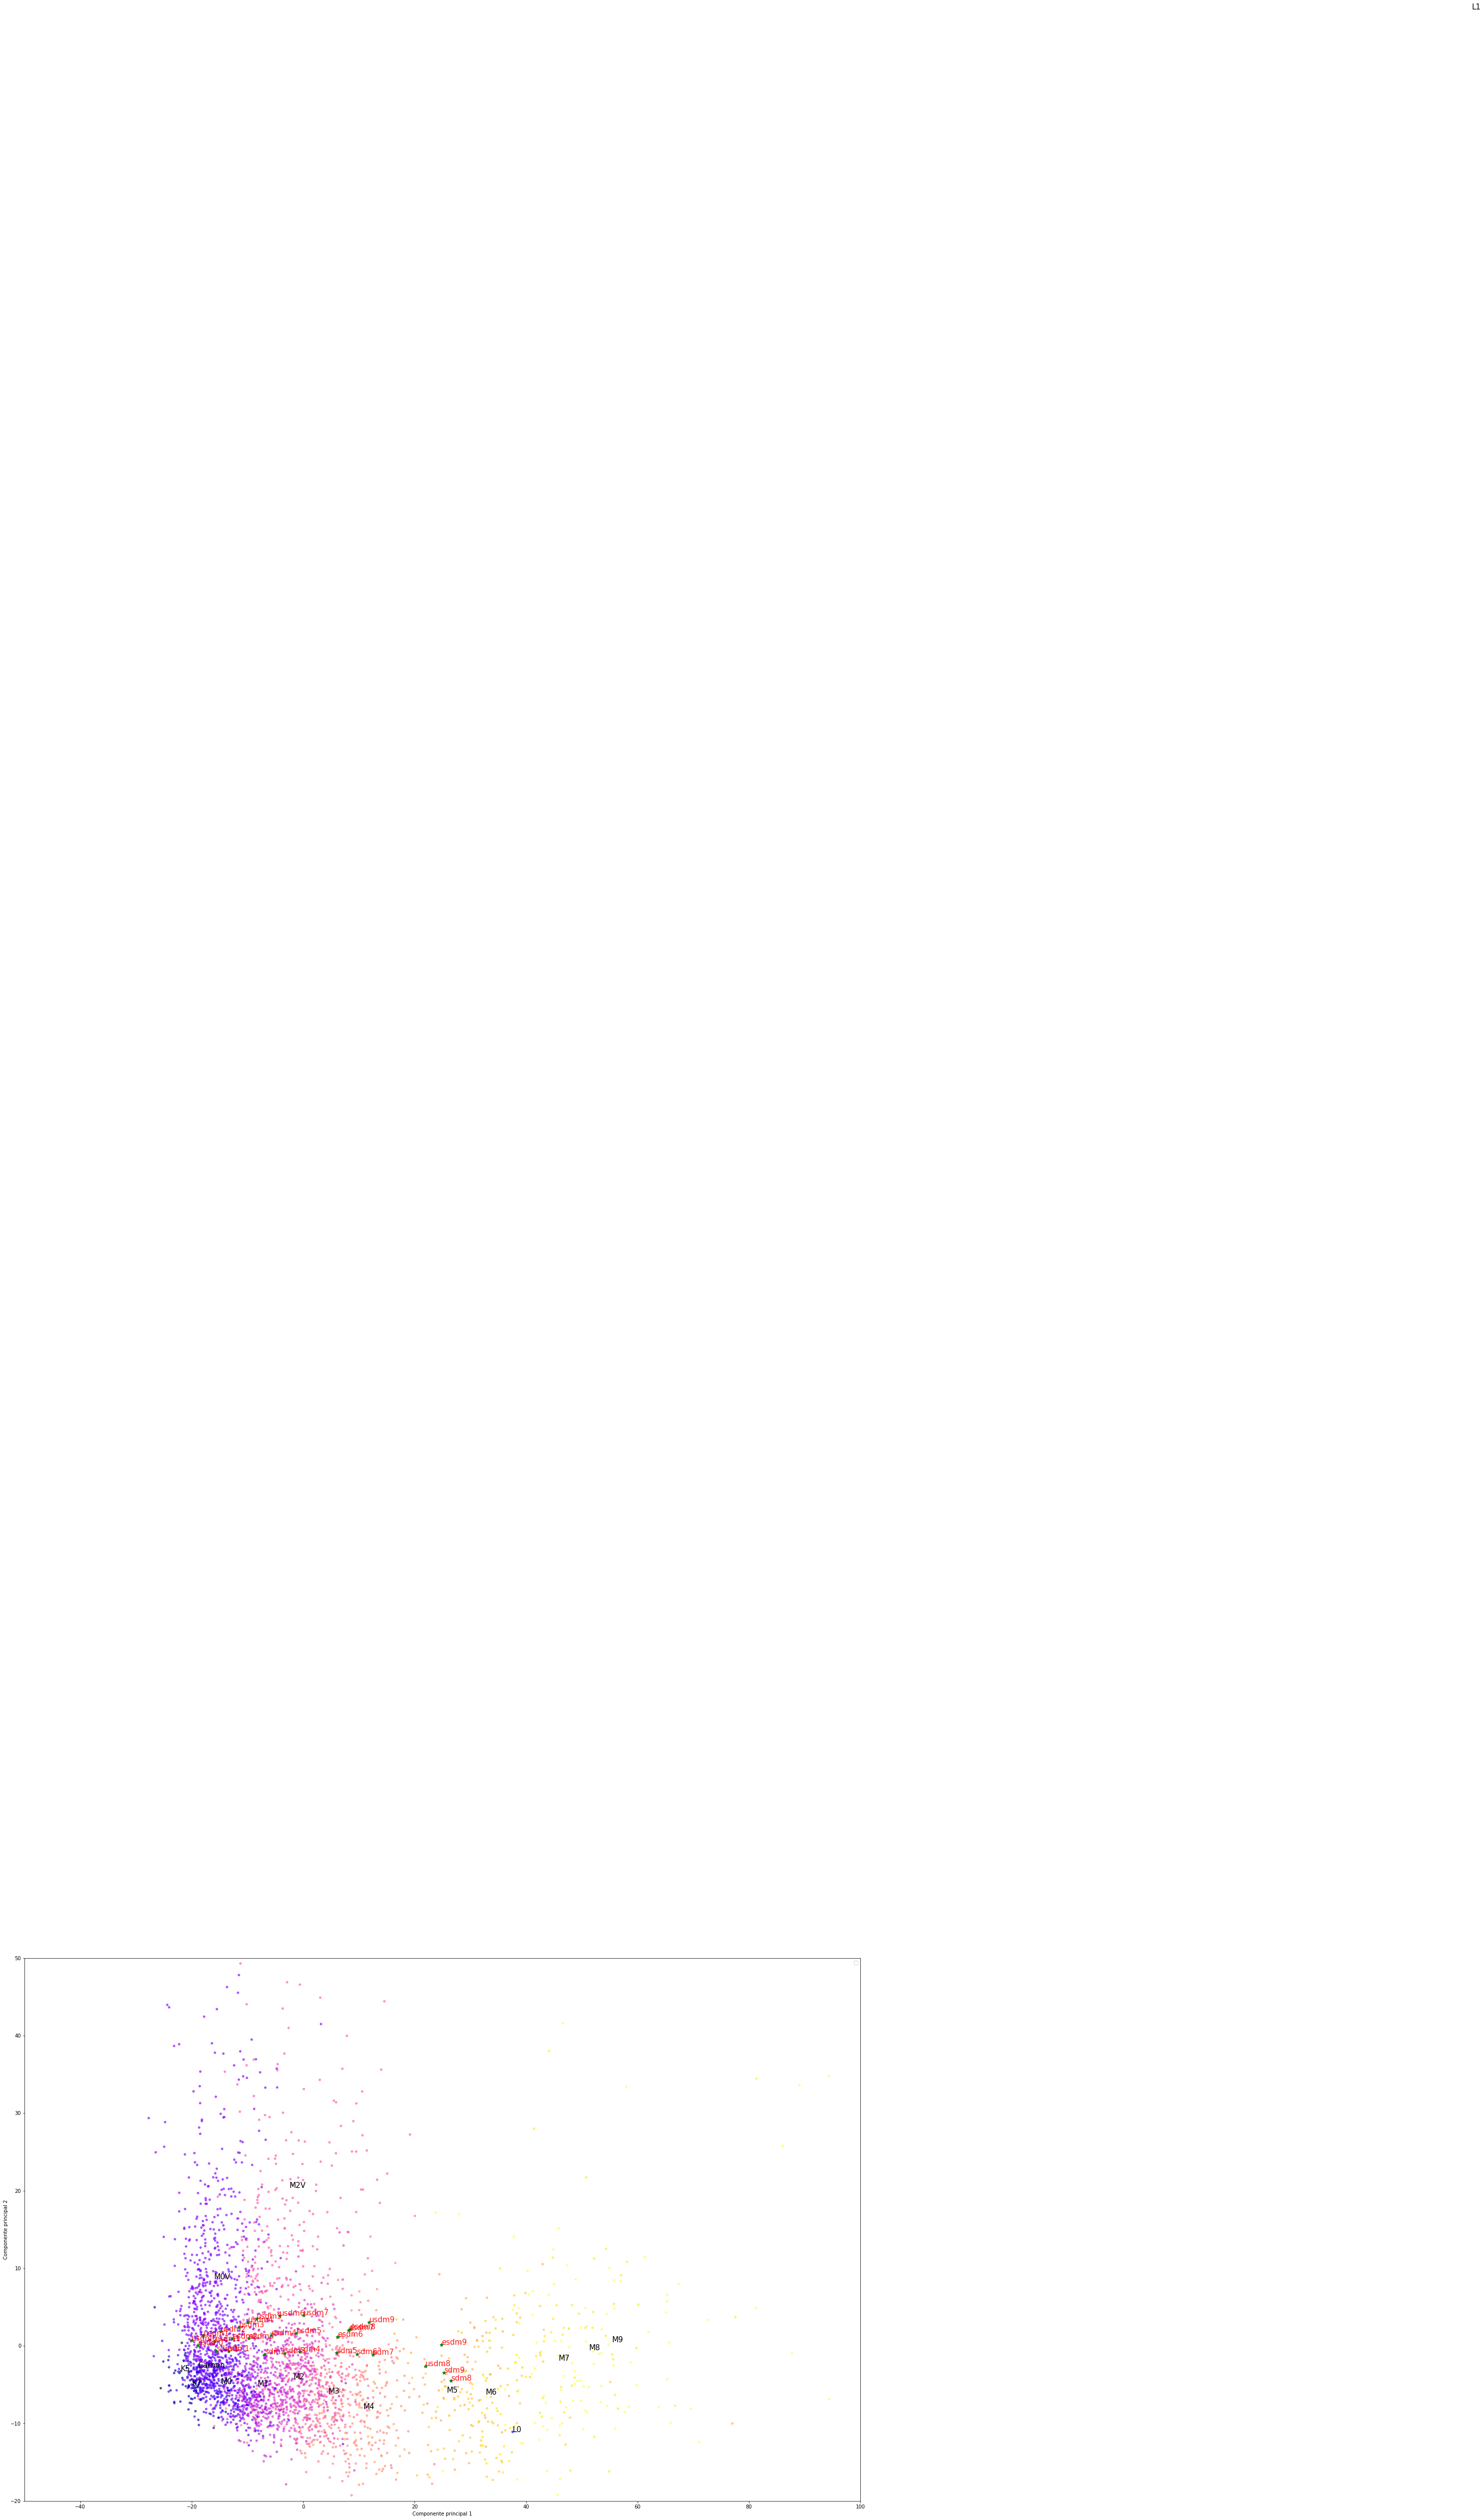

In [ ]:
comp =0
comp_aux =1

fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(X_pca_p_em[30:,:][:,comp], X_pca_p_em[30:,:][:,comp_aux] , cmap='gnuplot2',s=15,c=y,alpha=0.6)

for clase in df_clases_enanas_s_conj.index:
  ax.text(df_clases_enanas_s_conj.loc[clase][comp], df_clases_enanas_s_conj.loc[clase][comp_aux], clase,size=15,c='black') 
for i, plantilla in enumerate(subclases_m):
  ax.text(X_pca_p_em[i,comp],X_pca_p_em[i,comp_aux],plantilla,size=15,c='red',alpha=0.9)
  ax.scatter(X_pca_p_em[i,comp],X_pca_p_em[i,comp_aux],s=50, marker='*',c='green')

ax.set_ylim(-20,50)
ax.set_xlim(-50,100)
ax.set_xlabel('Componente principal '+str(comp+1))
ax.set_ylabel('Componente principal '+str(comp_aux+1))
ax.legend()
plt.show()

In [ ]:
componente_PCA = estimator_p_em.components_[0,:]
componente_PCA_1 = estimator_p_em.components_[1,:]
componente_PCA.shape

(1000,)

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(long_onda, componente_PCA,alpha=0.6)
plt.plot(long_onda, componente_PCA_1,alpha=0.9)

#FIN